# Статистический анализ данных сервиса аренды самокатов

В данном проекте  выполнен статистический анализ данных популярного сервиса аренды самокатов GoFast

Имеются следующие исходные данные:
- датасет с информацией о пользователях;
- датасет с информацией о поездках;
- информация о стоимости подписки, старта аренды и минуты аренды.

Необходимо проверить гипотезы, предложенные продакт-менеджерами.

Работа будет проведена в несколько шагов.
Шаг 1. Загрузка данных
- считать файлы, сохранить в датафреймы;
- вывести первые строки каждого набора данных, изучить общую информацию о каждом датафрейме

Шаг 2. Предобработка Данных
- привести столбец date к типу даты pandas
- создать новый столбец с номером месяца на основе столбца date
- проверка пропусков и дубликатов, обработка (при наличии)

Шаг 3. Исследовательский анализ данных
- описание и визуализация частоты встречаемости городов
- описание и визуализация соотношения пользователей с подпиской и без подписки
- описание и визуализация возраста пользователей
- описание и визуализация расстояния, корое пользователь преодолел за одну поездку
- описание продолжительности поездок

Шаг 4. Объединение данных
- объединение данных о пользователях, поездках и подписках в один датафрейм методом merge()
- создание датафреймов с данными о пользователях с подпиской и без нее
- визуализация информации о расстоянии и времени поездок для пользователей обеих категорий

Шаг 5. Подсчёт выручки
- создание датафрейма с агрегированными данными о поездках на основе датафрейма с объединёнными данными
- добавление столбца с помесячной выручкой, которую принёс каждый пользователь

Шаг 6. Проверка гипотез
- тратят ли пользователи с подпиской больше времени на поездки?
- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
- помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
- определение теста для проверки гипотезы количества обращений после обновления серверов

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
#Загрузим данные и просмотрим верхние 5 строк каждого датафрейма
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
display (users.head(5))
display (rides.head(5))
display (subscriptions.head(5))

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [3]:
#Изучим общие данные о датафреймах
display (users.info())
display (rides.info())
display (subscriptions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

Мы просмотрели верхние строчки и изучили общие данные. Видим, что в датасетах 1565 строчек о пользователях и 18068 строчек о поездках. В следующем шаге мы проверим имеющиеся данные на дубликаты. Пока видим, что данные достаточно полные, количество значений в столбцах одинаково, что указывает на отсутствие пропусков. Столбцы имеют наименование, соответствующее принятому стилю. Типы данных соответствуют значениям, которые имеются в столбцах

## Предобработка данных

In [4]:
#Приведем столбец date к типу даты pandas
pd.to_datetime(rides['date'], format='%Y-%m-%d')

0       2021-01-01
1       2021-01-18
2       2021-04-20
3       2021-08-11
4       2021-08-28
           ...    
18063   2021-11-04
18064   2021-11-16
18065   2021-11-18
18066   2021-11-27
18067   2021-12-29
Name: date, Length: 18068, dtype: datetime64[ns]

In [5]:
#создадим новый столбец с номером месяца на основе столбца date
rides['date'] = rides['date'].astype("datetime64[ns]")
rides['month'] = rides['date'].dt.to_period("M")
rides['month']

0        2021-01
1        2021-01
2        2021-04
3        2021-08
4        2021-08
          ...   
18063    2021-11
18064    2021-11
18065    2021-11
18066    2021-11
18067    2021-12
Name: month, Length: 18068, dtype: period[M]

Ранее были изучены данные о датафреймах. В датафреймах во всех столбцах совпадает количество имеющихся записей, что указывает на то, что пропусков нет. Теперь необходимо проверить таблицы на наличие дубликатов

In [6]:
display(users.duplicated().sum()) #смотрим кол-во дубликатов в таблице с пользователями
display(rides.duplicated().sum()) #смотрим кол-во дубликатов в таблице с поездками

31

0

В таблице с пользователями имеется 31 дубликат. Необходимо удалить повторяющиеся строки

In [7]:
users = users.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
users.info() # просмотрим сведения об обновленном датафрейме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB




Мы выполнили предобработку данных. Удалены дубликаты (31 значение), приведен столбец date к типу даты pandas, создан новый столбец с номером месяца. Предобработка окончена, можно переходить к исследовательскому анализу

## Исследовательский анализ данных

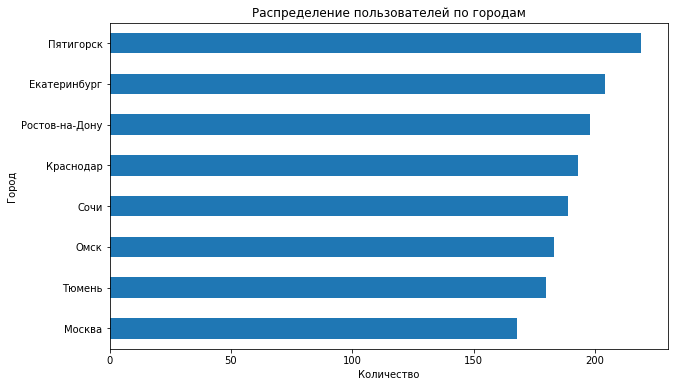

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [8]:
#построим график для столбца с названием города и посмотрим значения

users['city'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.xlabel('Количество')
plt.ylabel('Город')
plt.title('Распределение пользователей по городам')  # Добавление заголовка
plt.show()

display(users['city'].value_counts(ascending=False))

Видим, что больше всего данных о пользователях из Пятигорска, Екатеринбурга, Ростова-на-Дону. Меньше всего - из Москвы. Разброс значений - от 168 до 219

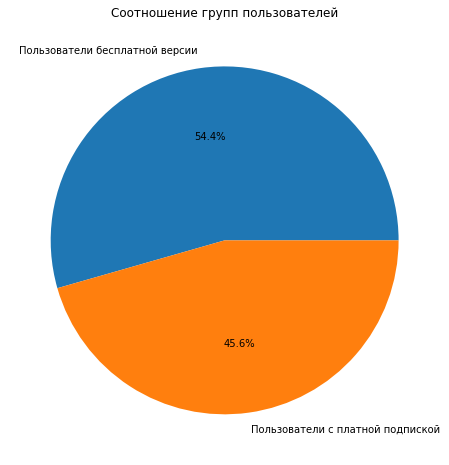

free     835
ultra    699
Name: subscription_type, dtype: int64

In [9]:
# Построим диаграмму для столбца с типом подписки и посмотрим значения
subscription_counts = users['subscription_type'].value_counts()

# Создание списка с новыми метками
new_labels = ['Пользователи бесплатной версии', 'Пользователи с платной подпиской']

# Построение круговой диаграммы с новыми метками
plt.figure(figsize=(8, 8))
plt.pie(subscription_counts, labels=new_labels, autopct='%1.1f%%')

# Добавление заголовка
plt.title('Соотношение групп пользователей')

# Отображение диаграммы
plt.show()
display(users['subscription_type'].value_counts(ascending=False))

Видим, что пользователей с платной подпиской меньше: 699 (45,6%) против 835 (54,4%).

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

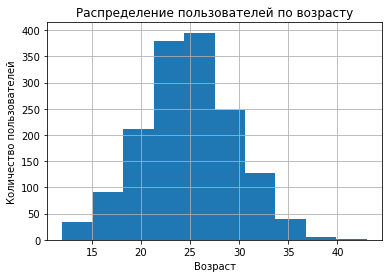

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [10]:
#построим гистограммы для столбца с данными о возрасте и посмотрим значения
users['age'].hist()
display(users['age'].value_counts(ascending=False))
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по возрасту')

plt.show()
display(users['age'].describe())

Видим, что больше всего пользователей в возрасте около 25 лет. По графику видно, что основная масса пользователей - люди в возрасте от 20 до 30 лет.
Применяя метод decribe(), видим, что медианный возраст - 25 лет, средний - 24.9 года

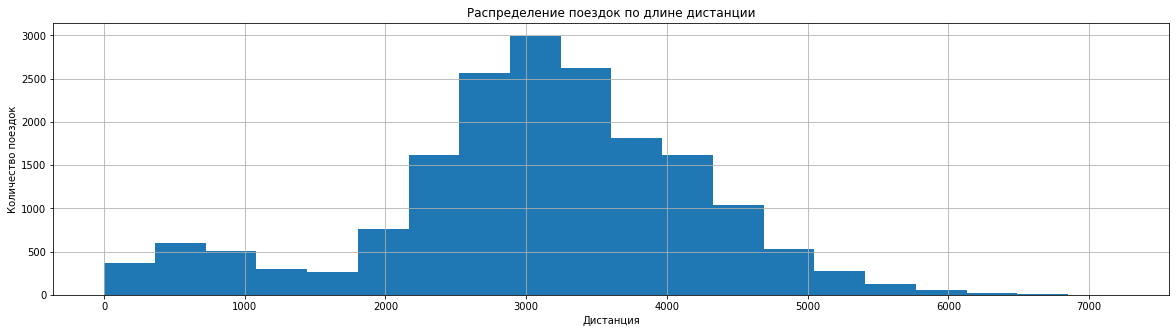

In [11]:
#построим гистограммы для столбца с дистанцией поездок
rides['distance'].hist(bins=20, figsize=(20,5))

# Добавление подписей к осям и заголовка
plt.xlabel('Дистанция')
plt.ylabel('Количество поездок')
plt.title('Распределение поездок по длине дистанции')

plt.show()

Видим, что больше всего поездок дистанцией больше 2 тыс. метров, но до 4 тыс. метров.

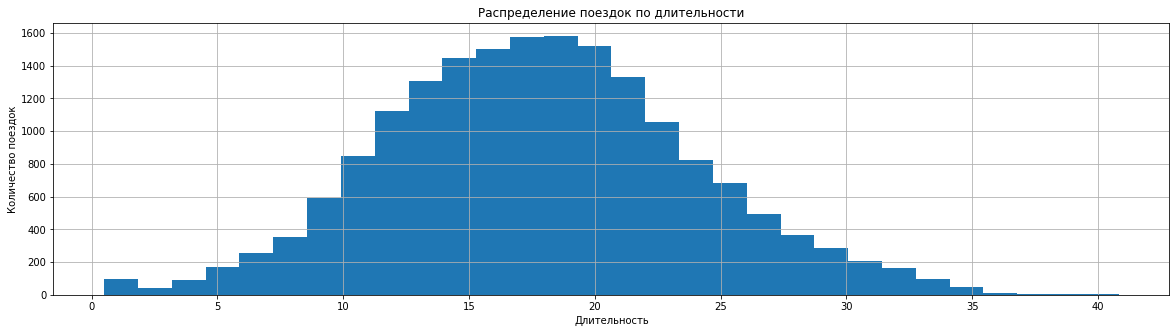

In [12]:
#построим гистограммы для столбца с длительностью поездок
rides['duration'].hist(bins=30, figsize=(20,5))
# Добавление подписей к осям и заголовка
plt.xlabel('Длительность')
plt.ylabel('Количество поездок')
plt.title('Распределение поездок по длительности')

plt.show()

Видим, что больше всего поездок длительностью от 10 до 25 минут

У нас есть странный пик около 0 как на гистограмме длительности, так и на гистограмме дистанции, необходимо рассмотреть на предмет аномалий. Возможно, поездки менее 3 минут - это сбои приложения и пользователь так и не начал поездку, либо подсчет времени/дистанции не был произведен по данной поездке, либо произведен неверно

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

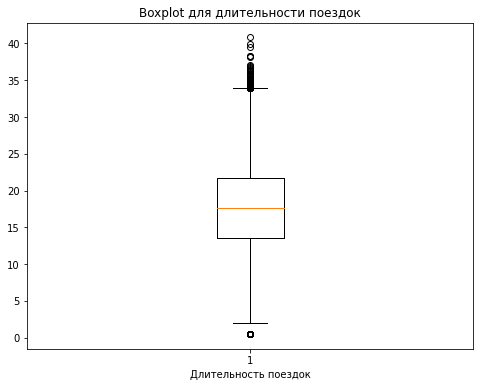

In [13]:
display(rides['duration'].describe())
# Построение boxplot
plt.figure(figsize=(8, 6))
box = plt.boxplot(rides['duration'])

# Настройка меток осей и заголовка
plt.xlabel('Длительность поездок')
plt.title('Boxplot для длительности поездок')

# Отображение графика
plt.show()

Если ехать на самокате менее 3 минут, то дистанция будет явно меньше 1000 м. Посмотри сколько строк со значением времени менее 3 минут и дистанцией более 1000 м.

In [14]:
rides[(rides['duration'] < 3) & (rides['distance'] > 1000)]

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,2021-08
6570,704,4830.824371,0.5,2021-10-14,2021-10
6680,712,4684.004397,0.5,2021-03-04,2021-03
6695,713,5215.642710,0.5,2021-02-25,2021-02
6768,718,5197.436649,0.5,2021-02-11,2021-02
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,2021-01
17242,1477,6724.932981,0.5,2021-01-12,2021-01
17314,1483,4445.481070,0.5,2021-03-06,2021-03
17505,1496,5722.551787,0.5,2021-02-14,2021-02


Ого! 95 строк со странным временем поездки. И все с достаточно большим расстоянием. Возможно была проведена акция с бесплатными минутами

In [15]:
# Удаление строк, где столбец 'duration' < 3 и столбец 'distance' > 1000
#rides = rides.drop(rides[(rides['duration'] < 3) & (rides['distance'] > 1000)].index)

rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), period[M](1)
memory usage: 705.9 KB


## Объединение данных

In [16]:
#объединим датафреймы, используя метод merge(), посмотрим 30 строк объединенного датафрейма и информацию о нем
users_rides_df = users.merge(rides, on='user_id', how='inner')
users_rides_subscriptions_df = users_rides_df.merge(subscriptions, on='subscription_type', how='inner')

display(users_rides_subscriptions_df.head(30))
display(users_rides_subscriptions_df.info())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,2021-01,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,2021-01,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,2021-04,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,2021-08,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,2021-08,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,2021-10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,2021-10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,2021-11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,2021-11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,2021-11,6,0,199


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  period[M]     
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3), period[M](1)
memory usage: 1.8+ MB


None

In [17]:
# Проверим кол-во строк и просмотрим несколько строк, чтобы удостовериться, что не добавлено ничего лишнего, ничего не потеряно
#и нет пропусков

display(rides.info())
display(users_rides_subscriptions_df.info())

display(rides.head(10))
display(users_rides_subscriptions_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), period[M](1)
memory usage: 705.9 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  period[M]     
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3), period[M](1)
memory usage: 1.8+ MB


None

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,2021-01
1,1,2617.592153,15.816871,2021-01-18,2021-01
2,1,754.159807,6.232113,2021-04-20,2021-04
3,1,2694.783254,18.511000,2021-08-11,2021-08
4,1,4028.687306,26.265803,2021-08-28,2021-08
5,1,2770.890808,16.650138,2021-10-09,2021-10
6,1,3039.020292,14.927879,2021-10-19,2021-10
7,1,2842.118050,23.117468,2021-11-06,2021-11
8,1,3412.690668,15.238072,2021-11-14,2021-11
9,1,748.690645,15.041884,2021-11-22,2021-11


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,2021-01,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,2021-01,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,2021-04,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,2021-08,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,2021-08,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,2021-10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,2021-10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,2021-11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,2021-11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,2021-11,6,0,199


Количество строк совпадает, пропусков нет. Просмотрели верхние 10 строк, объединение прошло без ошибок

In [18]:
#создадим отдельные датафреймы для пользователей с платной подпиской и без нее и выведем по 30 строк и просмотри основную информацию
df_free = users_rides_subscriptions_df.query('subscription_type == "free"')
df_ultra = users_rides_subscriptions_df.query('subscription_type == "ultra"')

display(df_free.head(10))
display(df_free.info())
display(df_ultra.head(10))
display(df_ultra.info())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,2021-01,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2021-02,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2021-02,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2021-02,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2021-02,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2021-02,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,2021-03,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,2021-04,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,2021-06,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,2021-06,8,50,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  period[M]     
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3), period[M](1)
memory usage: 1.1+ MB


None

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,2021-01,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,2021-01,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,2021-04,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,2021-08,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,2021-08,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,2021-10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,2021-10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,2021-11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,2021-11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,2021-11,6,0,199


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   period[M]     
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3), period[M](1)
memory usage: 660.2+ KB


None

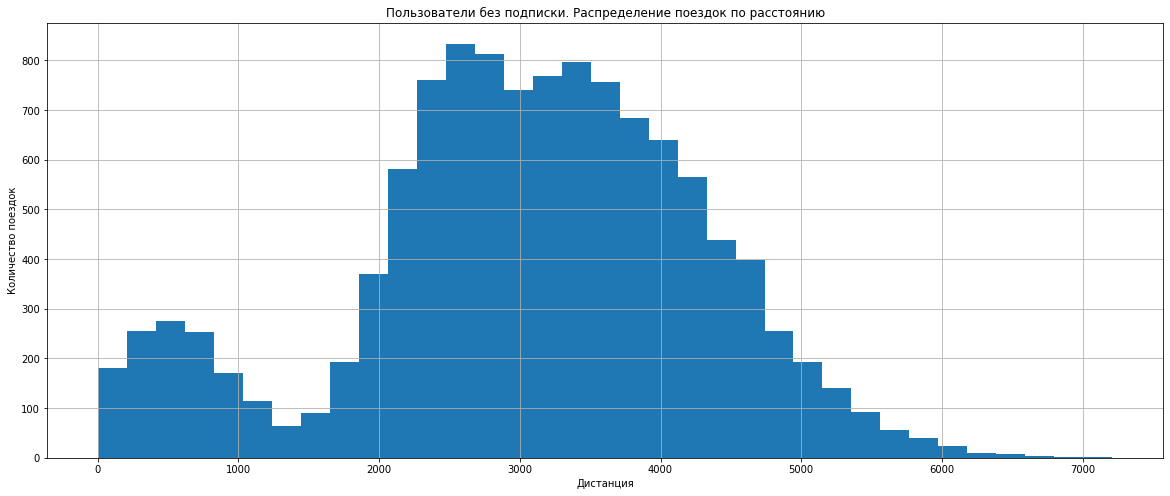

In [19]:
#Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

df_free['distance'].hist(figsize=(20, 8), bins=35)
plt.xlabel('Дистанция')
plt.ylabel('Количество поездок')
plt.title('Пользователи без подписки. Распределение поездок по расстоянию')

# Отображение гистограмм
plt.show()

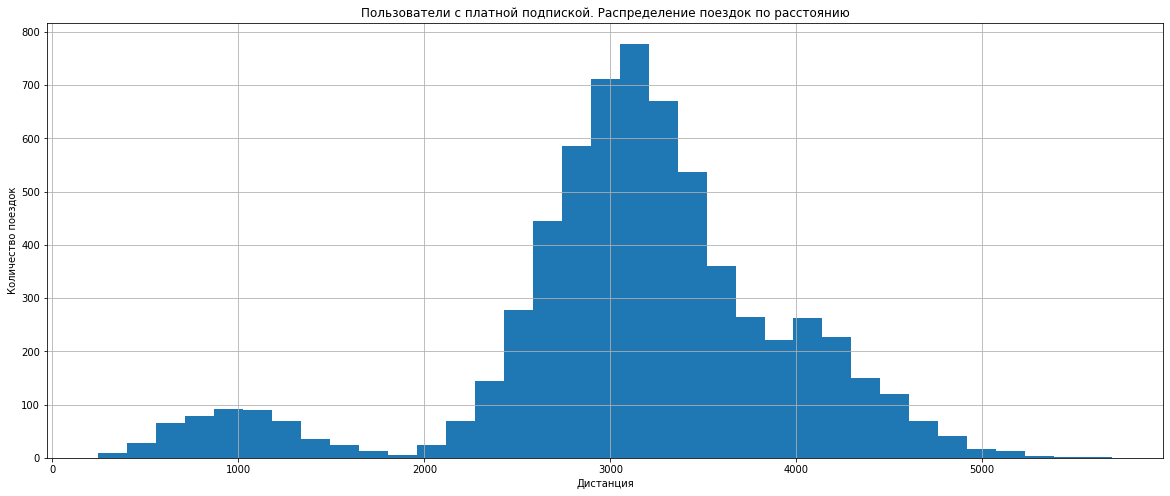

In [20]:
#Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

df_ultra['distance'].hist(figsize=(20, 8), bins=35)
plt.xlabel('Дистанция')
plt.ylabel('Количество поездок')
plt.title('Пользователи с платной подпиской. Распределение поездок по расстоянию')

# Отображение гистограмм
plt.show()

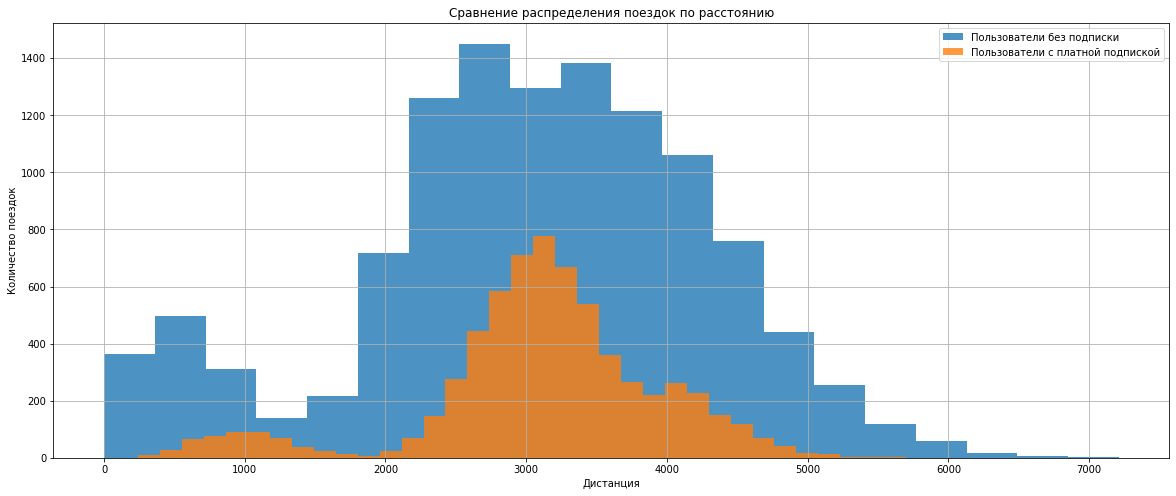

In [21]:
# Создание нового графика
plt.figure(figsize=(20, 8))

# Построение первой гистограммы
df_free['distance'].hist(alpha=0.8, bins=20, label='Пользователи без подписки')

# Построение второй гистограммы
df_ultra['distance'].hist(alpha=0.8, bins=35, label='Пользователи с платной подпиской')

# Добавление подписей к осям и заголовка
plt.xlabel('Дистанция')
plt.ylabel('Количество поездок')
plt.title('Сравнение распределения поездок по расстоянию')

# Добавление легенды
plt.legend()

# Отображение гистограмм
plt.show()

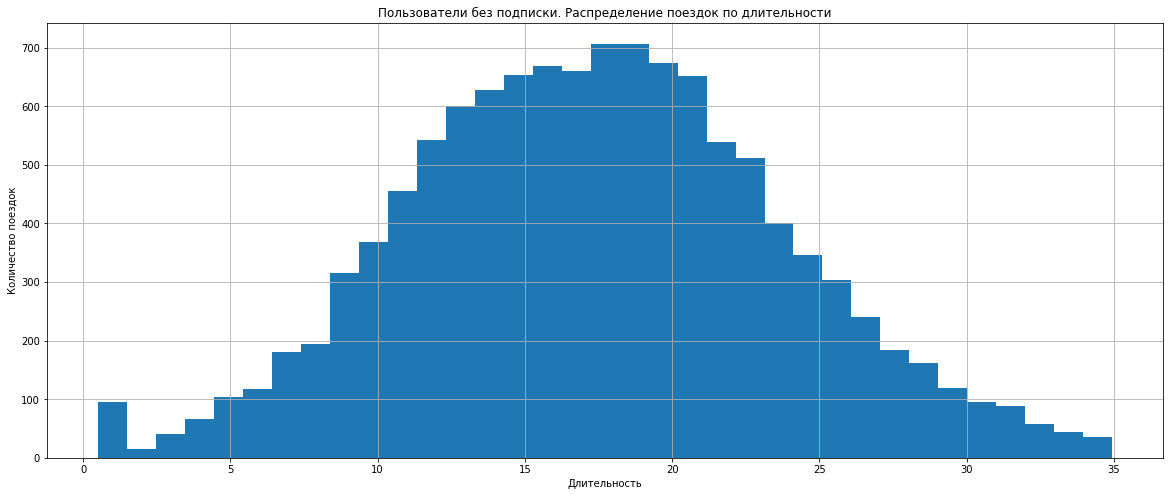

In [22]:
# Построение гистограммы
df_free['duration'].hist(figsize=(20, 8), bins = 35)

# Добавление подписей к осям и заголовка
plt.xlabel('Длительность')
plt.ylabel('Количество поездок')
plt.title('Пользователи без подписки. Распределение поездок по длительности')

# Отображение гистограммы
plt.show()

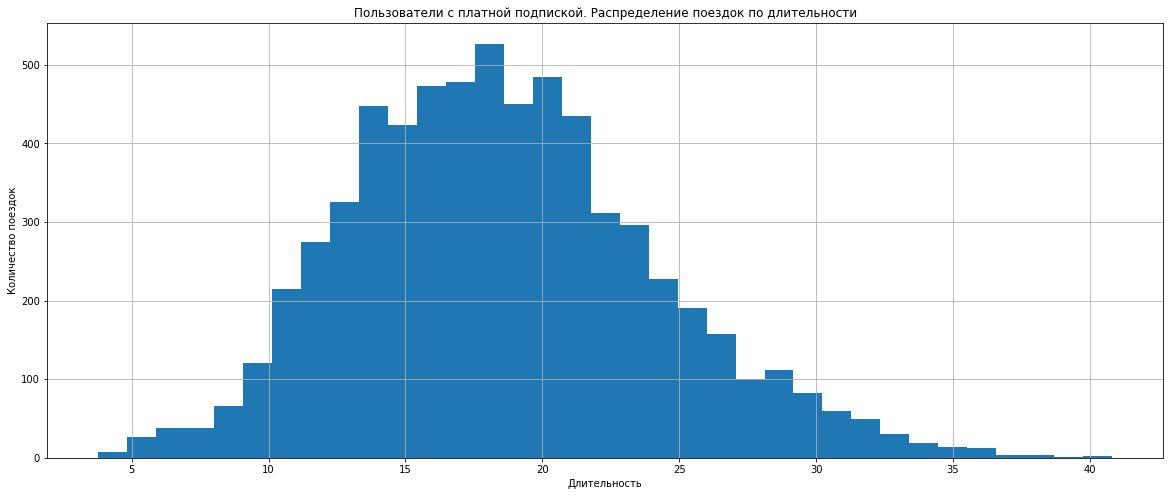

In [23]:
# Построение гистограммы
df_ultra['duration'].hist(figsize=(20, 8), bins = 35)

# Добавление подписей к осям и заголовка
plt.xlabel('Длительность')
plt.ylabel('Количество поездок')
plt.title('Пользователи с платной подпиской. Распределение поездок по длительности')

# Отображение гистограммы
plt.show()

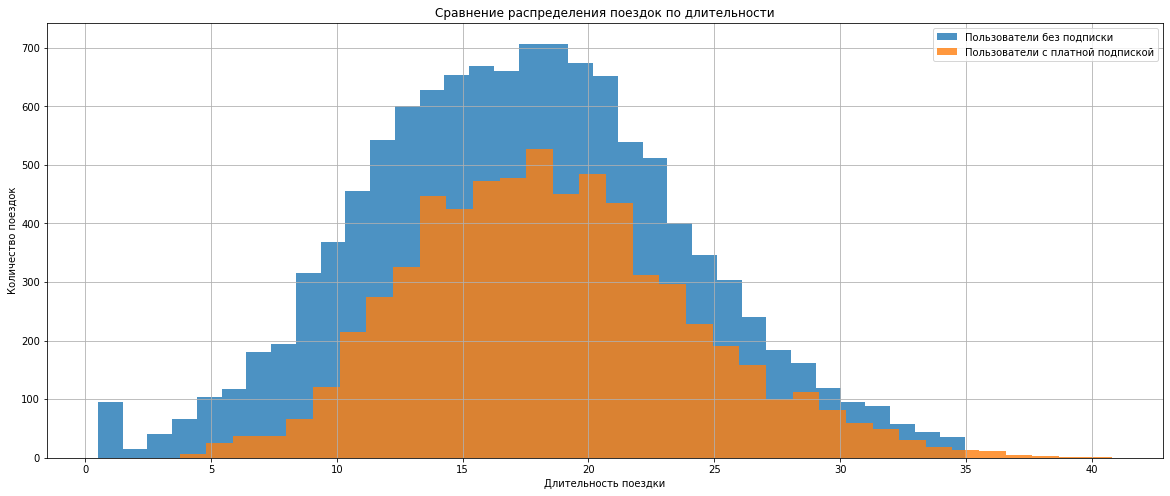

In [24]:
# Создание нового графика
plt.figure(figsize=(20, 8))

# Построение первой гистограммы
df_free['duration'].hist(alpha=0.8, bins=35, label='Пользователи без подписки')

# Построение второй гистограммы
df_ultra['duration'].hist(alpha=0.8, bins=35, label='Пользователи с платной подпиской')

# Добавление подписей к осям и заголовка
plt.xlabel('Длительность поездки')
plt.ylabel('Количество поездок')
plt.title('Сравнение распределения поездок по длительности')

# Добавление легенды
plt.legend()

# Отображение гистограмм
plt.show()

Видим, что пользователи без платной подписки чаще используют самокаты на короткие расстояния. И диапазон расстояний шире. Пользователи с платной подпиской пользуются арендой чаще на более длинных поездках, поездок меньше 2000 м у них очень мало.

Распределение пользователей по длительности в зависимости от наличия подписки отличается мало. Видим, что синяя гистограмма больше, что объясняется большим числом поездок. В целом в распределении нет больших отличий

## Подсчёт выручки

Выполняем округление продолжительности каждой поездки в каждой строке

In [25]:
# Округлим значение из столбца duration с помощью «потолка»
users_rides_subscriptions_df['duration'] = np.ceil(users_rides_subscriptions_df['duration']) 
display(users_rides_subscriptions_df.head(5))

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,2021-01,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,2021-01,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,2021-04,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,2021-08,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,2021-08,6,0,199


Сгруппируем по user_id датафреймы с суммарным расстоянием, количеством поездок и суммарным временем. Затем уже выполним агрегацию данных

In [26]:
# Группировка по пользователю и месяцу
grouped = users_rides_subscriptions_df.groupby(['user_id', pd.Grouper(key='date', freq='M')])

# Агрегация данных
grouped_aggregated = grouped.agg({'subscription_type': 'first', 'distance': 'sum', 'duration': 'sum', 'date': 'count'})

# Переименование столбцов
grouped_aggregated.rename(columns={'distance': 'total_distance', 'duration': 'total_duration', 'date': 'trip_count'}, inplace=True)

#расширим таблицу данными о подписках для дальнейшего подсчета выручки
grouped_aggregated = grouped_aggregated.merge(subscriptions, on='subscription_type', how='inner')

# просмотрим верхние 25 строк и общую информацию
display(grouped_aggregated.head(10))
display(grouped_aggregated.info())

,subscription_type,total_distance,total_duration,trip_count,minute_price,start_ride_price,subscription_fee
0,ultra,7027.511294,42.0,2,6,0,199
1,ultra,754.159807,7.0,1,6,0,199
2,ultra,6723.470560,46.0,2,6,0,199
3,ultra,5809.911100,32.0,2,6,0,199
4,ultra,7003.499363,56.0,3,6,0,199
5,ultra,6751.629942,28.0,2,6,0,199
6,ultra,10187.723006,63.0,3,6,0,199
7,ultra,6164.381824,40.0,2,6,0,199
8,ultra,3255.338202,14.0,1,6,0,199
9,ultra,6780.722964,48.0,2,6,0,199


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11331 entries, 0 to 11330
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subscription_type  11331 non-null  object 
 1   total_distance     11331 non-null  float64
 2   total_duration     11331 non-null  float64
 3   trip_count         11331 non-null  int64  
 4   minute_price       11331 non-null  int64  
 5   start_ride_price   11331 non-null  int64  
 6   subscription_fee   11331 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 708.2+ KB


None

In [27]:
#Добавим столбец с выручкой
grouped_aggregated['revenue'] = grouped_aggregated['trip_count']*grouped_aggregated['start_ride_price'] + grouped_aggregated['total_duration']*grouped_aggregated['minute_price'] + grouped_aggregated['subscription_fee']
display(grouped_aggregated.head(10))

,subscription_type,total_distance,total_duration,trip_count,minute_price,start_ride_price,subscription_fee,revenue
0,ultra,7027.511294,42.0,2,6,0,199,451.0
1,ultra,754.159807,7.0,1,6,0,199,241.0
2,ultra,6723.470560,46.0,2,6,0,199,475.0
3,ultra,5809.911100,32.0,2,6,0,199,391.0
4,ultra,7003.499363,56.0,3,6,0,199,535.0
5,ultra,6751.629942,28.0,2,6,0,199,367.0
6,ultra,10187.723006,63.0,3,6,0,199,577.0
7,ultra,6164.381824,40.0,2,6,0,199,439.0
8,ultra,3255.338202,14.0,1,6,0,199,283.0
9,ultra,6780.722964,48.0,2,6,0,199,487.0


In [28]:
#разделим наш датафрейм на два по типу подписки для дальнейших проверок гипотез
agg_free = grouped_aggregated.query('subscription_type == "free"')
agg_ultra = grouped_aggregated.query('subscription_type == "ultra"')

display(agg_free.head())
display(agg_free.info())
display(agg_ultra.head())
display(agg_ultra.info())

,subscription_type,total_distance,total_duration,trip_count,minute_price,start_ride_price,subscription_fee,revenue
4533,free,2515.690719,15.0,1,8,50,0,170.0
4534,free,13446.659764,89.0,5,8,50,0,962.0
4535,free,3798.334905,19.0,1,8,50,0,202.0
4536,free,2984.551206,16.0,1,8,50,0,178.0
4537,free,5927.650988,29.0,2,8,50,0,332.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6798 entries, 4533 to 11330
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subscription_type  6798 non-null   object 
 1   total_distance     6798 non-null   float64
 2   total_duration     6798 non-null   float64
 3   trip_count         6798 non-null   int64  
 4   minute_price       6798 non-null   int64  
 5   start_ride_price   6798 non-null   int64  
 6   subscription_fee   6798 non-null   int64  
 7   revenue            6798 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 478.0+ KB


None

,subscription_type,total_distance,total_duration,trip_count,minute_price,start_ride_price,subscription_fee,revenue
0,ultra,7027.511294,42.0,2,6,0,199,451.0
1,ultra,754.159807,7.0,1,6,0,199,241.0
2,ultra,6723.470560,46.0,2,6,0,199,475.0
3,ultra,5809.911100,32.0,2,6,0,199,391.0
4,ultra,7003.499363,56.0,3,6,0,199,535.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4533 entries, 0 to 4532
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subscription_type  4533 non-null   object 
 1   total_distance     4533 non-null   float64
 2   total_duration     4533 non-null   float64
 3   trip_count         4533 non-null   int64  
 4   minute_price       4533 non-null   int64  
 5   start_ride_price   4533 non-null   int64  
 6   subscription_fee   4533 non-null   int64  
 7   revenue            4533 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 318.7+ KB


None

Мы создали датафреймы для пользователей с платной подпиской и без нее, посчитали количество поездок, расстояние, время, выручку за каждый месяц каждого пользователя. Можно переходить к проверке гипотез

## Проверка гипотез

##### Проверка гипотезы "Тратят ли пользователи с подпиской больше времени на поездки?"
Проведем проверку односторонним T-тестом
Нулевая гипотеза: средняя продолжительность поездок для пользователей с подпиской равна средней продолжительности поездок для пользователей без подписки

Альтернативная гипотеза: средняя продолжительность поездок для пользователей с подпиской больше средней продолжительности поездок для пользователей без подписки.

In [29]:
duration_ultra = df_ultra['duration']
duration_free = df_free['duration']
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(
    duration_ultra, 
    duration_free,
    alternative='greater')

display('p-значение:', results.pvalue)

display((df_ultra['duration']).mean())
display((df_free['duration']).mean())

'p-значение:'

1.2804098316645618e-34

18.54198516280583

17.39090929866399

Получили очень низкое р-значение (p < 0.05). Это означает, что мы отвергаем нулевую гипотезу и принимаем альтернативную. В данном случае нулевая гипотеза гласит, что средняя продолжительность поездок для пользователей с платной подпиской равна средней продолжительности поездок для пользователей с бесплатной подпиской

Мы принимаем альтернативную гипотезу, которая гласит, что средняя продолжительность поездок для пользователей с платной подпиской больше средней продолжительности поездок для пользователей с бесплатной подпиской. Вывод также подтверждается расчетами средних значений. Средняя продолжительность аренды без платной подписки - 17.4 мин, с платной подпиской - 18.5 минут

##### Проверка гипотезы "среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?"
Проведем проверку односторонним T-тестом

Нулевая гипотеза: cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

Альтернативная гипотеза: cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров

In [30]:
interested_distance = 3130
alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    df_ultra['distance'], 
    interested_distance,
    alternative='greater')

display('p-значение:', results.pvalue)

display((df_ultra['distance']).mean())

'p-значение:'

0.9195368847849785

3115.4453880370247

Получили очень высокое p-значение (0.92). Это значит,что мы не имеем достаточных оснований для отвержения нулевой гипотезы. Cреднее значение дистанции поездки для пользователей с платной подпиской не превышает 3130 метров

Перепроверим средним значением. Получилось 3115 м

##### Проверка гипотезы "помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки"
Проведем проверку односторонним T-тестом

Нулевая гипотеза: средняя помесячная выручка от пользователей с подпиской равна средней помесячной выручке от пользователей без подписки

Альтернативная гипотеза: средняя помесячная выручка от пользователей с подпиской выше, чем средняя помесячная выручка от пользователей без подписки

In [31]:
revenue_free = agg_free['revenue']
revenue_ultra = agg_ultra['revenue']
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(
    revenue_ultra, 
    revenue_free,
    alternative='greater')

display('p-значение:', results.pvalue)
display((agg_free['revenue']).mean())
display((agg_ultra['revenue']).mean())

'p-значение:'

1.8850394384715216e-31

328.6413651073845

362.7921906022502

Получили очень низкое p-значение, сильно меньше уровня статистической значимости. Это значит, мы можем отвергнуть нулевую гипотезу и принять альтернативную, т.е. средняя выручка от пользователей с подпиской выше, чем от пользователей без подписки.

Данный вывод подтвержден расчетом средней выручки. Средняя для пользолвателей без подписки - 326 руб., с платной подпиской - 361 руб.

## Итоговый вывод

В данном проекте  выполнили статистический анализ данных популярного сервиса аренды самокатов GoFast
На начальном этапе провели загрузку и предобработку данных. На этапе предобработки удалили дубликаты, поработали с столбцом времени

Далее был проведен исследовательский анализ данных. Были построены гистограммы, графики, диаграммы, описаны и провизуализированы значения исходных данных. Обнаружились аномалии при подсчете дистанции и времени аренды самоката. Они составили менее 2%, поэтому их просто удалили.

Далее было объединение данных в один датафрейм. Сравнили характеристики поездок пользователей с подпиской и без. 

Следующим шагом добавили новых столбец с подсчетом выручки за месяц на каждого пользователя, а затем разделенили датафрейм на датафреймы с поездками пользователей с подпиской и без нее. 

Далее был проведен статистический анализ. Были проверены различные гипотезы. При проверке гипотез пользовались t-тестом, предварительно формулируя нулевую и альтернативную гипотезу, получили результаты значения p, которые перепроверили расчетами средних величин

В итоге сделаны следующие выводы:
- средняя продолжительность поездки пользователя с подпиской выше на 1,15 минуты или на 6,6%;
- среднее расстояние, преодоленное на самокате составило менее 3130 м (составило 3115 м);
- месячная выручка от пользователей с платной подпиской выше на 34.2 рубля, т.е. на 10,4%.

Для развития сервиса можно дать следующие рекомендации:
- постараться привлечь больше пользователей, которые будут использовать пользоваться платной версией;
- рассчитывать бюджет на привлечение исходя из средней разницы выручки в 34.2 рубля в месяц на каждого пользователя с платной подпиской


Проверка гипотез
- тратят ли пользователи с подпиской больше времени на поездки?
- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
- помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
- определение теста для проверки гипотезы количества обращений после обновления серверов